**Goal** : To predict the fare of the taxi ride using Random Forest given pickup and drop-off locations, the pickup timestamp, and the passenger count

**Data Understanding**
+ unique_id= A unique identifier or key for each record in the dataset
+ date_time_of_pickup= The time when the ride started 
+ longitude_of_pickup= Longitude of the taxi ride pickup point
+ latitude_of_pickup= Latitude of the taxi ride pickup point
+ longitude__of_dropoff= Longitude of the taxi ride dropoff point
+ latitude_of_dropoff= Latitude of the taxi ride dropoff
+ point no_of_passenger= count of the passengers during the ride
+ Amount= (target variable) dollar amount of the cost of the taxi ride

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###  Data Reading

In [2]:
df = pd.read_csv('TaxiFare.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [3]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


## Data Preparation

In [4]:
df["amount"].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

+ Minimum value of the fare is negative which can not be possible
+ Hence removing that from the data

In [5]:
index = df[df['amount']<2.0].index
index

Int64Index([2039, 2486, 2780, 10002, 13032, 27891, 28839, 36722, 42337, 47302], dtype='int64')

In [6]:
df.drop(index, inplace = True)

In [7]:
df["amount"].describe()

count    49990.000000
mean        11.366813
std          9.684697
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [8]:
df.describe(percentiles = [0.01,0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1.0]).T

,count,mean,std,min,1%,10%,20%,30%,50%,60%,70%,80%,90%,100%,max
amount,49990.0,11.366813,9.684697,2.500000,3.300000,4.500000,5.500000,6.500000,8.500000,9.700000,11.500000,14.100000,20.500000,200.000000,200.000000
longitude_of_pickup,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.002780,-73.994647,-73.990051,-73.981840,-73.977276,-73.971329,-73.962097,-73.950996,40.783472,40.783472
latitude_of_pickup,49990.0,39.933598,6.225469,-74.006893,0.000000,40.717985,40.729991,40.739676,40.752679,40.758877,40.764020,40.771051,40.779778,401.083332,401.083332
longitude_of_dropoff,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.002710,-73.993792,-73.988925,-73.980082,-73.975400,-73.968782,-73.958438,-73.944750,40.851027,40.851027
latitude_of_dropoff,49990.0,39.926903,6.012677,-74.006377,0.000000,40.713277,40.728554,40.739490,40.753373,40.759222,40.764448,40.772570,40.782897,43.415190,43.415190
no_of_passenger,49990.0,1.667914,1.289250,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,6.000000,6.000000


+ No calculating the distance on the basis of longitude and latitude

In [9]:
df["X1"] = df["latitude_of_pickup"]
df["X2"] = df["latitude_of_dropoff"]
df["Y1"] = df["longitude_of_pickup"]
df["Y2"] = df["longitude_of_dropoff"]

+ Here I am using Eucladian Distance method to calculate the distance.

In [10]:
df["Distance_Travel"] = np.sqrt((np.square(df["latitude_of_pickup"]-df["latitude_of_dropoff"]))+(np.square(df["longitude_of_pickup"]-df["longitude_of_dropoff"])))

In [11]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,40.711303,40.782004,-74.016048,-73.979268,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,40.768008,40.783762,-73.968095,-73.956655,0.019470


In [12]:
df1=df.drop(columns=["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"], axis = 1)


In [13]:
df1.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,40.768008,40.783762,-73.968095,-73.956655,0.019470


In [14]:
df1[['date','time','zone']] = df1['date_time_of_pickup'].str.split(pat = " ",n= -1, expand = True)

In [15]:
df1.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,time,zone
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC


In [16]:
df2 = df1.copy()

In [17]:
df2['amount'] = np.where(df2['amount']>= 50,52, df2['amount'])
df2['Distance_Travel'] = np.where(df2['Distance_Travel']>= 0.228, 0.228, df2['Distance_Travel'])
df2['no_of_passsenger'] = np.where(df2['no_of_passenger']>= 5,4, df2['no_of_passenger'])
#outlier treatment

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            49990 non-null  object 
 1   amount               49990 non-null  float64
 2   date_time_of_pickup  49990 non-null  object 
 3   no_of_passenger      49990 non-null  int64  
 4   X1                   49990 non-null  float64
 5   X2                   49990 non-null  float64
 6   Y1                   49990 non-null  float64
 7   Y2                   49990 non-null  float64
 8   Distance_Travel      49990 non-null  float64
 9   date                 49990 non-null  object 
 10  time                 49990 non-null  object 
 11  zone                 49990 non-null  object 
 12  no_of_passsenger     49990 non-null  int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 5.3+ MB


In [19]:
df2['date'] = pd.to_datetime(df2['date'])
df2['date_time_of_pickup'] = pd.to_datetime(df2['date_time_of_pickup'])
#Changing the type from object tom datetime

In [20]:
df2["hours"] = df2["date_time_of_pickup"].dt.hour
df2["min"] = df2["date_time_of_pickup"].dt.minute
df2["second"] = df2["date_time_of_pickup"].dt.second
df2["year"] = df2["date_time_of_pickup"].dt.year
df2["day_of_the_month"] = df2["date_time_of_pickup"].dt.day
#Extracting some features from date_time_of_pickup

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   unique_id            49990 non-null  object             
 1   amount               49990 non-null  float64            
 2   date_time_of_pickup  49990 non-null  datetime64[ns, UTC]
 3   no_of_passenger      49990 non-null  int64              
 4   X1                   49990 non-null  float64            
 5   X2                   49990 non-null  float64            
 6   Y1                   49990 non-null  float64            
 7   Y2                   49990 non-null  float64            
 8   Distance_Travel      49990 non-null  float64            
 9   date                 49990 non-null  datetime64[ns]     
 10  time                 49990 non-null  object             
 11  zone                 49990 non-null  object             
 12  no_of_passsenger  

In [22]:
df2

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,time,zone,no_of_passsenger,hours,min,second,year,day_of_the_month
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,1,17,26,21,2009,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,1,16,52,16,2010,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,2,0,35,0,2011,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,1,4,30,42,2012,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC,1,7,51,0,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,1,40.748531,40.705993,-73.999973,-74.016899,0.045782,2013-06-12,23:25:15,UTC,1,23,25,15,2013,12
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,1,40.768211,40.760597,-73.984756,-73.987366,0.008049,2015-06-22,17:19:18,UTC,1,17,19,18,2015,22
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,1,40.739428,40.759483,-74.002698,-73.998108,0.020574,2011-01-30,04:53:00,UTC,1,4,53,0,2011,30
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,2,40.777567,40.779687,-73.946062,-73.953450,0.007686,2012-11-06,07:09:00,UTC,2,7,9,0,2012,6


In [23]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"

In [24]:
df2['time_of_day'] = df2['hours'].apply(time_of_day)

In [25]:
df2['day'] = df2['date_time_of_pickup'].dt.day_name()
df2['day_no'] = df2['date_time_of_pickup'].dt.weekday

#### Manhattan Distance formula

In [26]:
def manhattan_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [27]:
df2['manhattan_dist'] = manhattan_distance(df2['X1'],df2['X2'],df2['Y1'],df2['Y2'],1)

In [28]:
df2.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,...,no_of_passsenger,hours,min,second,year,day_of_the_month,time_of_day,day,day_no,manhattan_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,...,1,17,26,21,2009,15,Evening,Monday,0,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,...,1,16,52,16,2010,5,Afternoon,Tuesday,1,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,...,2,0,35,0,2011,18,Night,Thursday,3,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,...,1,4,30,42,2012,21,Night,Saturday,5,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,...,1,7,51,0,2010,9,Morning,Tuesday,1,0.027194


### Data Analysis

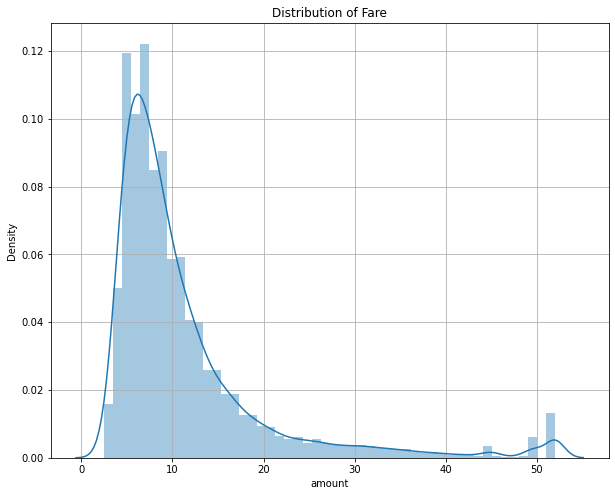

In [29]:
plt.figure(figsize = (10,8))
sns.distplot(df2['amount'])
plt.title('Distribution of Fare')
plt.grid()

+ Density of the fare is maximum in between 0 to 20 amount. it is a skewed distribution.

Text(0.5, 1.0, 'Fare vs Hours')

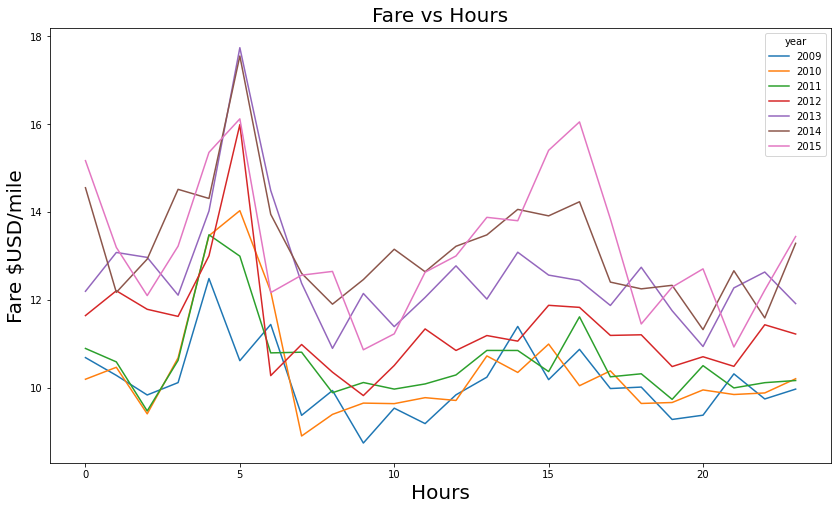

In [30]:
df2.pivot_table(index = 'hours', columns = 'year', values = 'amount', aggfunc = 'mean').plot(figsize = (14,8))
plt.xlabel('Hours', fontsize = (20))
plt.ylabel('Fare $USD/mile',fontsize = (20))
plt.title('Fare vs Hours', fontsize = (20))

+ Above figure show the variation of fare with respect to hour in different years

Text(0, 0.5, 'Average Fare')

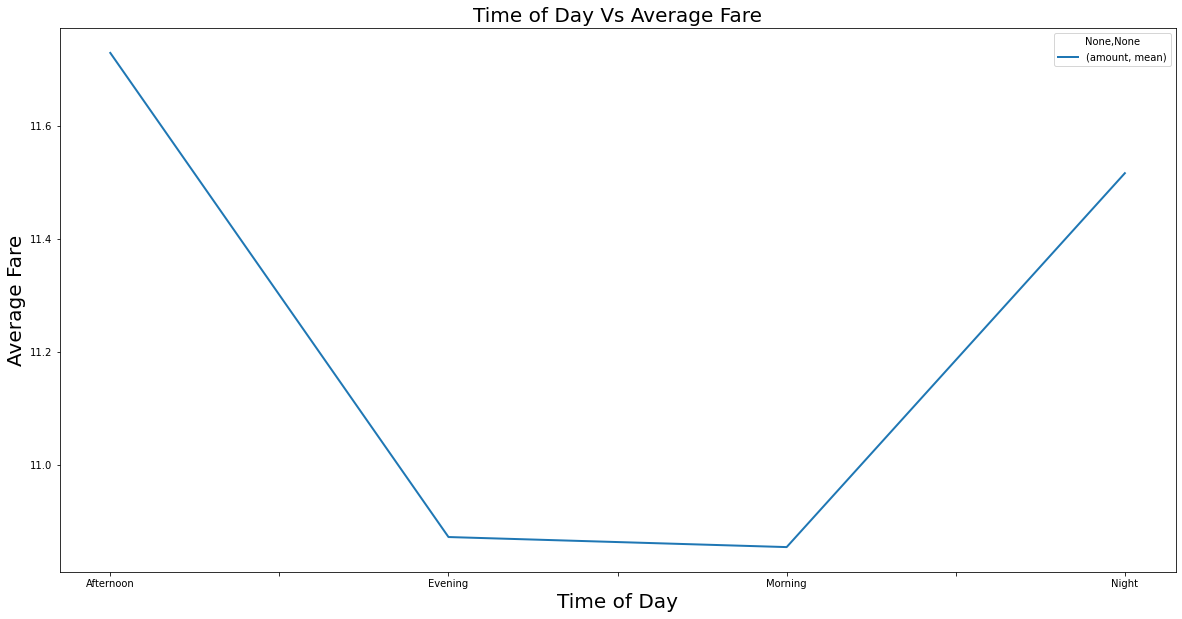

In [31]:
df2.groupby(df2['time_of_day']).agg({"amount":["mean"]}).plot(figsize = (20,10), linewidth = 2)
plt.title("Time of Day Vs Average Fare", fontsize = (20))
plt.xlabel("Time of Day", fontsize = (20))
plt.ylabel("Average Fare", fontsize = (20))

Text(0, 0.5, 'Average Fare')

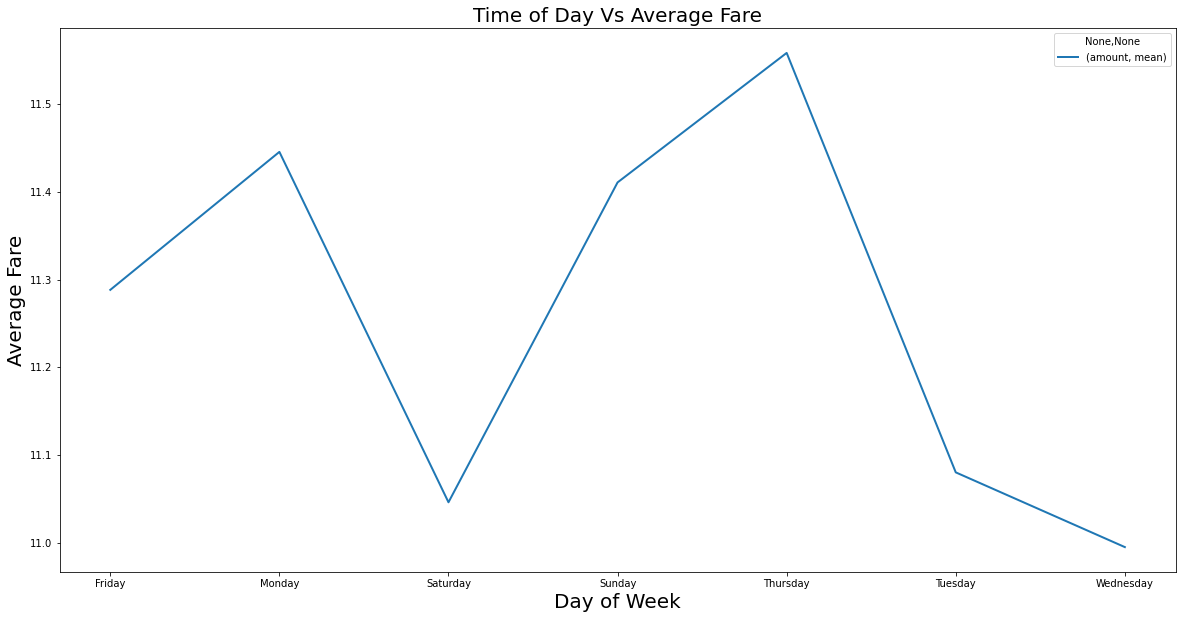

In [32]:
df2.groupby(df2['day']).agg({"amount":["mean"]}).plot(figsize = (20,10), linewidth = 2)
plt.title("Time of Day Vs Average Fare", fontsize = (20))
plt.xlabel("Day of Week", fontsize = (20))
plt.ylabel("Average Fare", fontsize = (20))

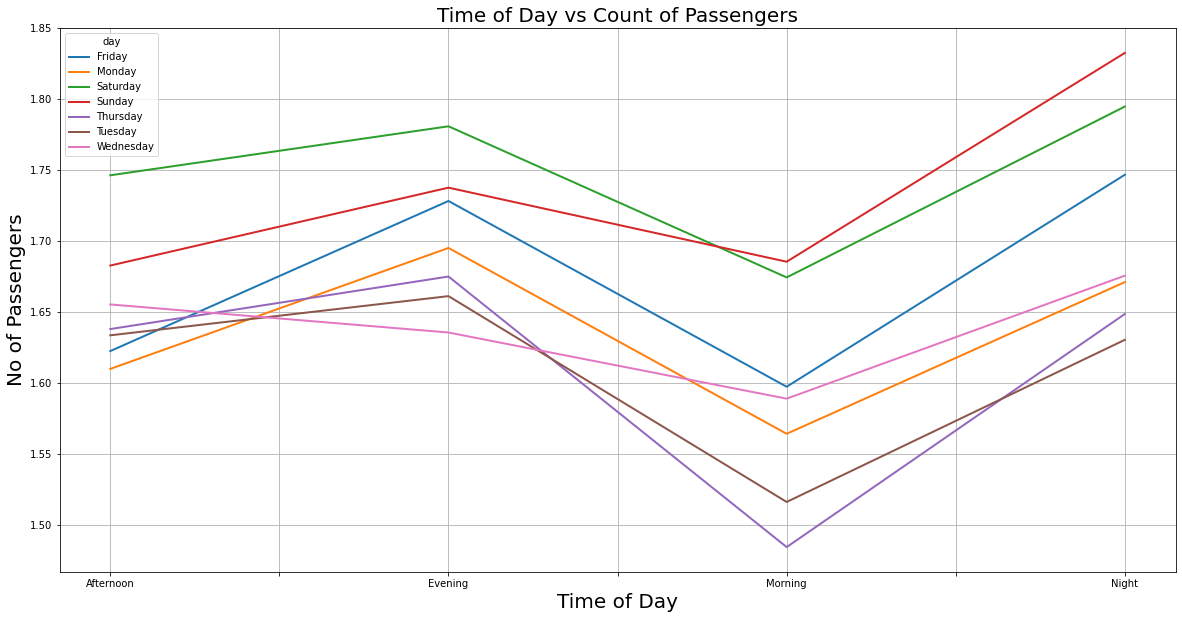

In [33]:
df2.pivot_table(index = 'time_of_day', columns = 'day', values = 'no_of_passenger', aggfunc = 'mean').plot(kind = 'line', figsize = (20,10), linewidth = 2)
plt.title("Time of Day vs Count of Passengers", fontsize = (20))
plt.xlabel("Time of Day", fontsize = (20))
plt.ylabel("No of Passengers", fontsize = (20))
plt.grid()

+ It's merely a different version of the graph above. With respect to different days, time of day vs. average fare. Wednesday has the lowest average fare for evening and morning travel, while Friday and Monday have the highest average fare for afternoon and night travel.

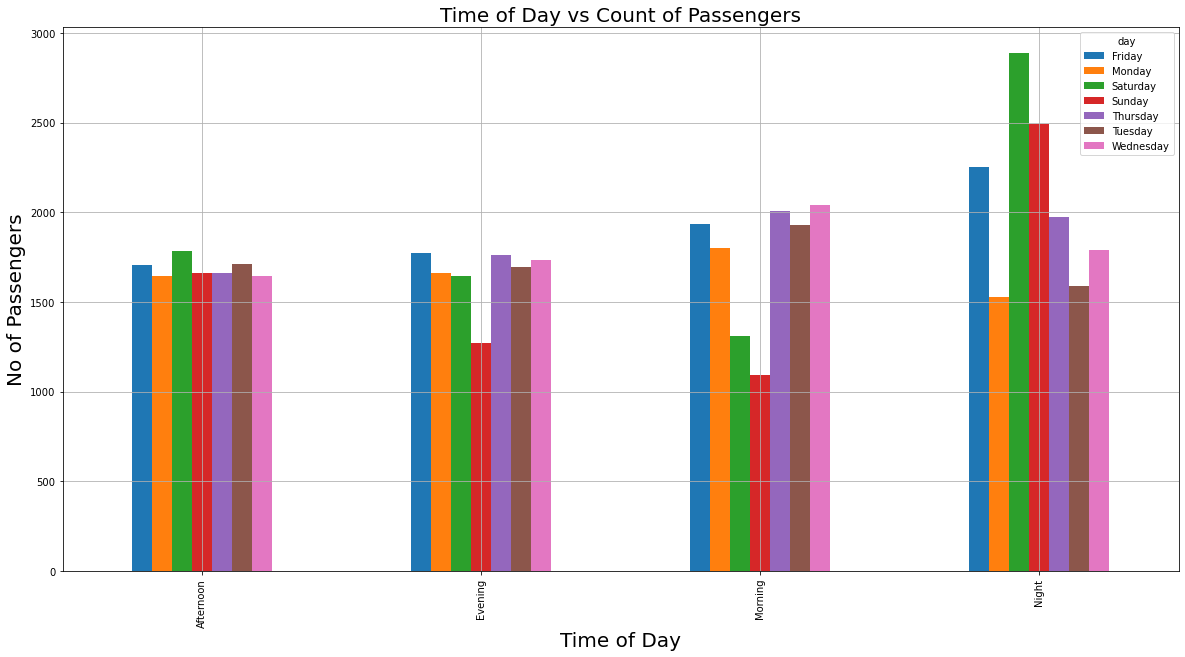

In [34]:
df2.pivot_table(index = 'time_of_day', columns = 'day', values = 'no_of_passenger', aggfunc = 'count').plot(kind = 'bar', figsize = (20,10))
plt.title("Time of Day vs Count of Passengers", fontsize = (20))
plt.xlabel("Time of Day", fontsize = (20))
plt.ylabel("No of Passengers", fontsize = (20))
plt.grid()

+ The suitable trend may be seen when looking at the time of day vs. the number of passengers on different days. The majority of passengers travelling at night do so on weekends, particularly on Saturday and Sunday, while for other times of day, particularly in the morning, less people use taxi services on Saturday and Sunday.

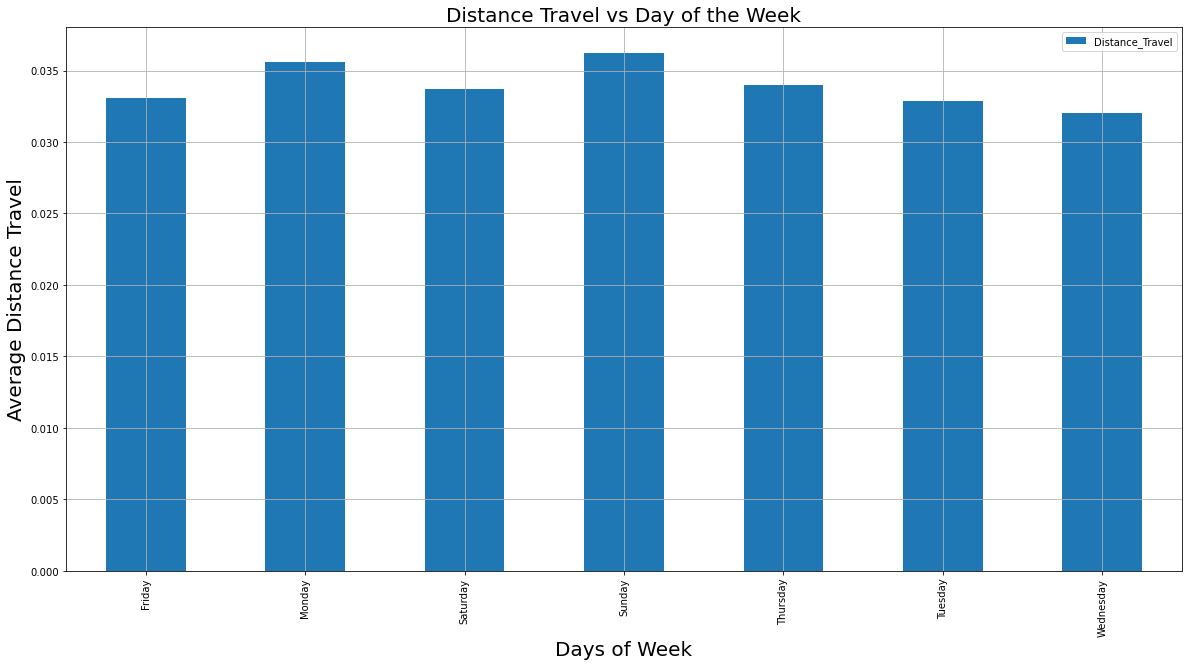

In [35]:
df2.pivot_table(index = 'day',values = 'Distance_Travel', aggfunc = 'mean').plot(figsize = (20,10), kind = 'bar')
plt.title("Distance Travel vs Day of the Week", fontsize = (20))
plt.xlabel('Days of Week', fontsize = (20))
plt.ylabel('Average Distance Travel', fontsize = (20))
plt.grid()

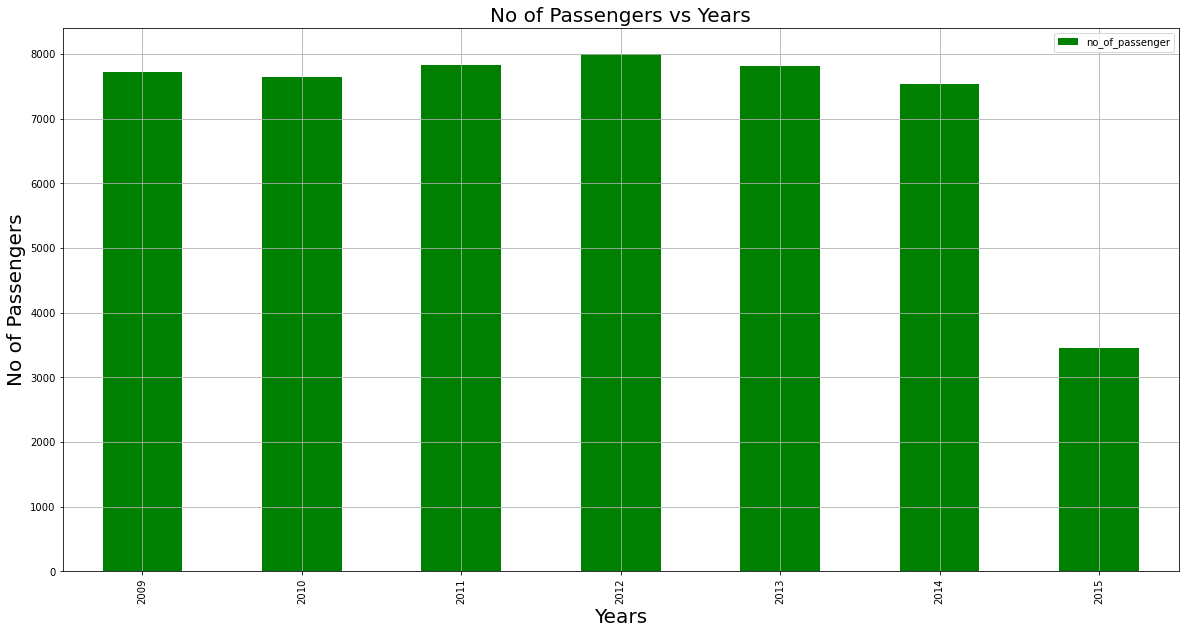

In [36]:
df2.pivot_table(index = 'year',values = 'no_of_passenger', aggfunc = 'count').plot(figsize = (20,10), kind = 'bar', color = 'green')
plt.title("No of Passengers vs Years", fontsize = (20))
plt.xlabel('Years', fontsize = (20))
plt.ylabel('No of Passengers', fontsize = (20))
plt.grid()

+ The number of passengers is falling at the end of 2014, as seen in the graph above, and the trend of each day for the given years is similar

In [37]:
df2.select_dtypes(include = 'O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unique_id    49990 non-null  object
 1   time         49990 non-null  object
 2   zone         49990 non-null  object
 3   time_of_day  49990 non-null  object
 4   day          49990 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [38]:
df2.drop(columns=["unique_id","time","zone","date","min","second","date_time_of_pickup","X1","X2","Y1","Y2"],inplace =True)


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount            49990 non-null  float64
 1   no_of_passenger   49990 non-null  int64  
 2   Distance_Travel   49990 non-null  float64
 3   no_of_passsenger  49990 non-null  int64  
 4   hours             49990 non-null  int64  
 5   year              49990 non-null  int64  
 6   day_of_the_month  49990 non-null  int64  
 7   time_of_day       49990 non-null  object 
 8   day               49990 non-null  object 
 9   day_no            49990 non-null  int64  
 10  manhattan_dist    49990 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 4.6+ MB


In [41]:
df3 = pd.get_dummies(df2, columns = ['time_of_day', 'day'])

In [42]:
df3["Is_Weekend"] =np.where(df3["day_no"].isin ([0,6]),1,0)
df3["Is_starting_of_month"] = np.where(df3["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)
df3["Is_middle_of_month"] = np.where(df3["day_of_the_month"].isin (range(11,21)),1,0)
df3["Is_end_of_month"] = np.where(df3["day_of_the_month"].isin (range(21,32)),1,0)
df3["Is_leap_year"] = np.where((df3["year"]%4 == 0),1,0)

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 49990 non-null  float64
 1   no_of_passenger        49990 non-null  int64  
 2   Distance_Travel        49990 non-null  float64
 3   no_of_passsenger       49990 non-null  int64  
 4   hours                  49990 non-null  int64  
 5   year                   49990 non-null  int64  
 6   day_of_the_month       49990 non-null  int64  
 7   day_no                 49990 non-null  int64  
 8   manhattan_dist         49990 non-null  float64
 9   time_of_day_Afternoon  49990 non-null  uint8  
 10  time_of_day_Evening    49990 non-null  uint8  
 11  time_of_day_Morning    49990 non-null  uint8  
 12  time_of_day_Night      49990 non-null  uint8  
 13  day_Friday             49990 non-null  uint8  
 14  day_Monday             49990 non-null  uint8  
 15  da

In [47]:
y = df3['amount']
X = df3.drop(columns = ['amount'])

## Modelling

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [49]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.2 , random_state = 30)

In [50]:
X_train.shape

(39992, 24)

In [51]:
X_test.shape

(9998, 24)

In [53]:
from sklearn import metrics

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
print("train R2", rf.score(X_train,y_train))
print("test R2", rf.score(X_test,y_test))

train R2 0.9719870177372574
test R2 0.7934057724236063


In [57]:
param = {"n_estimators":[20,50],"criterion":['squared_error'] ,"max_depth": [3,5],"min_samples_split":[2,4],
                "min_samples_leaf":[2,4]}

rf2 = RandomForestRegressor()
Grid_search = GridSearchCV(estimator = rf2, param_grid=param,cv=5,verbose=1,n_jobs=-1)
Grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [3, 5],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [20, 50]},
             verbose=1)

In [58]:
print("Train R2", Grid_search.score(X_train,y_train))
print("Test R2",Grid_search.score(X_test,y_test))

Train R2 0.8104618823212693
Test R2 0.7875028632389663


In [59]:
print("MAE of Train: ", np.mean(np.abs((y_train-Grid_search.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-Grid_search.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((y_train-Grid_search.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-Grid_search.predict(X_test))**2) ))

MAE of Train:  2.160977207625804
MAE of Test:  2.2208733189129384
RMSE of Train:  3.9125085673184103
RMSE of Test:  4.1338225687451695


+ R2 is a measure of how well a model predicts the target variables. The error is calculated using the RMSE and MAE methods. As can be seen, our model has good accuracy and a low bias/variance trade-off. We can conclude from this analysis that our model is performing well.